## Sales Analysis Project

#### Data Inspection 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('AusApparalSales4thQrt2020.csv')
df=pd.DataFrame(data)
print(df.head())
df.tail()
df.info()

         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


#### Inferences from above dataset:
1: The dataset contain total 6 columns['Date','Time','State','Group','Unit','Sales'].     
2: So basically this dataset represents how much units are sold in which categories with date time and states


#### Data Wrangling


In [4]:
df.isna().sum()
df['Date']=pd.to_datetime(df['Date'])
df['Date']
df.set_index('Date', inplace=True)
from sklearn.preprocessing import MinMaxScaler
numerical_cols = ['Unit', 'Sales']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df.head())
Total_Sales=df.groupby('Group')['Sales'].sum()

                  Time State     Group      Unit     Sales
Date                                                      
2020-10-01     Morning    WA      Kids  0.095238  0.095238
2020-10-01     Morning    WA       Men  0.095238  0.095238
2020-10-01     Morning    WA     Women  0.031746  0.031746
2020-10-01     Morning    WA   Seniors  0.206349  0.206349
2020-10-01   Afternoon    WA      Kids  0.015873  0.015873


#### Inferences from Data Wrangling:
1: Initially we are checking for null values.                                             
2: We are converting the date column to date object and setting the index to date..       
3: Next we are normalizing the numerical columns..

#### Data analysis

First 5 rows of the dataset:
                  Time State     Group      Unit     Sales
Date                                                      
2020-10-01     Morning    WA      Kids  0.095238  0.095238
2020-10-01     Morning    WA       Men  0.095238  0.095238
2020-10-01     Morning    WA     Women  0.031746  0.031746
2020-10-01     Morning    WA   Seniors  0.206349  0.206349
2020-10-01   Afternoon    WA      Kids  0.015873  0.015873

Descriptive Statistics for 'Sales' and 'Units':

Sales statistics:
Mean: 0.25405433778449654
Median: 0.1904761904761905
Mode: [0.11111111]
Standard Deviation: 0.20478417107280047

Unit statistics:
Mean: 0.2540543377844965
Median: 0.19047619047619047
Mode: [0.11111111]
Standard Deviation: 0.20478417107280045


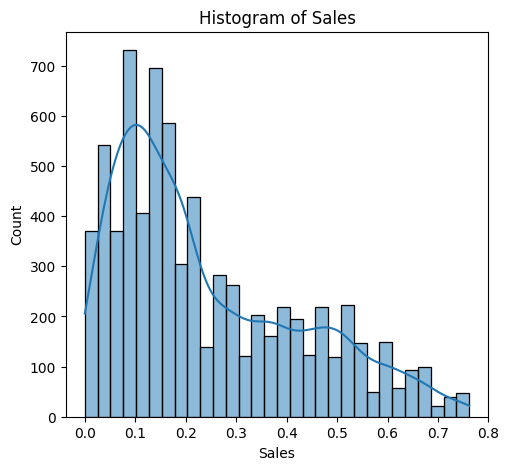

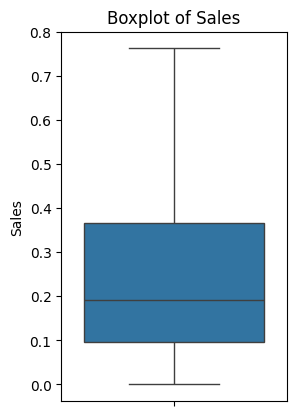

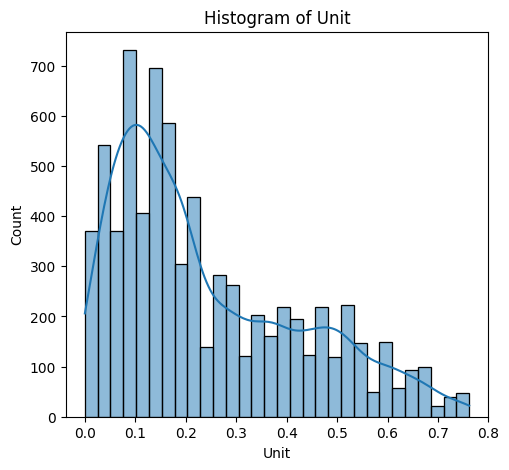

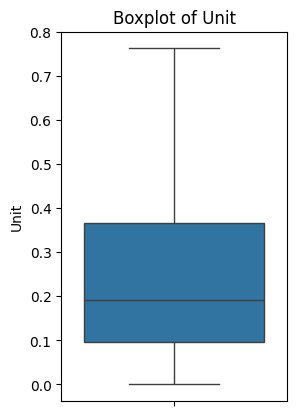


Group with highest total sales:  Kids ($450.29)
Group with lowest total sales:  Seniors ($438.14)

Weekly report saved as 'Weekly_Report.csv'.
Monthly report saved as 'Monthly_Report.csv'.
Quarterly report saved as 'Quarterly_Report.csv'.


C:\Users\karan\AppData\Local\Temp\ipykernel_6404\1927437952.py:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M').sum()
C:\Users\karan\AppData\Local\Temp\ipykernel_6404\1927437952.py:55: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly = df.resample('Q').sum()


In [14]:
import pandas as pd
import numpy as np
print("First 5 rows of the dataset:")
print(df.head())
# --- a. Descriptive statistics on Sales and Unit columns ---
print("\nDescriptive Statistics for 'Sales' and 'Units':")
cols = ['Sales', 'Unit']
for col in cols:
    print(f"\n{col} statistics:")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode().values}")
    print(f"Standard Deviation: {df[col].std()}")
# ----b. Analyzing the units and sales columns for any outliers and handling them by IQR method
def treat_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
for col in cols:
    df = treat_outliers_iqr(df, col)
for col in cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.show()
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
# --- c. Identify the group with highest and lowest sales ---
# Assuming there is a 'Group' column
if 'Group' in df.columns:
    group_sales = df.groupby('Group')['Sales'].sum()
    max_group = group_sales.idxmax()
    min_group = group_sales.idxmin()

    print(f"\nGroup with highest total sales: {max_group} (${group_sales[max_group]:,.2f})")
    print(f"Group with lowest total sales: {min_group} (${group_sales[min_group]:,.2f})")
else:
    print("\n'Group' column not found in the data.")

# --- d. Weekly, Monthly, and Quarterly Reports ---
# Weekly Report
weekly = df.resample('W').sum()
weekly.to_csv("Weekly_Report.csv")
print("\nWeekly report saved as 'Weekly_Report.csv'.")
# Monthly Report
monthly = df.resample('M').sum()
monthly.to_csv("Monthly_Report.csv")
print("Monthly report saved as 'Monthly_Report.csv'.")
# Quarterly Report
quarterly = df.resample('Q').sum()
quarterly.to_csv("Quarterly_Report.csv")
print("Quarterly report saved as 'Quarterly_Report.csv'.")


#### Inferences from Data Analysis
1: Preforming descriptive statistics on Sales and Unit columns and mostly the data are right skewed[Positive Distribution]..                          
2: Identifying the group with highest and lowest sales ie: Men has the highest total      sales and Kids has lowest total sales.                                                    
3: Generating a weekly, monthly, and quarterly reports to document and presenting the results of the analysis conducted..                                                       
4: Identifying Outliers with the help of Boxplots...                                      
5: Handling Outliers by IQR Method..

#### Data Visualization

Group
Kids       480.142857
Men        484.444444
Seniors    473.571429
Women      482.492063
Name: Sales, dtype: float64
State-wise Sales Analysis by Demographic Group:

Group        Kids         Men     Seniors       Women
State                                                
NSW    109.444444  112.206349  106.904762  113.158730
NT      27.619048   28.015873   26.126984   27.317460
QLD     45.460317   44.714286   43.428571   44.285714
SA      83.587302   84.476190   84.873016   86.476190
TAS     28.095238   27.984127   27.301587   26.841270
VIC    158.793651  159.095238  158.507937  159.571429
WA      27.142857   27.952381   26.428571   24.841270


<Figure size 1200x600 with 0 Axes>

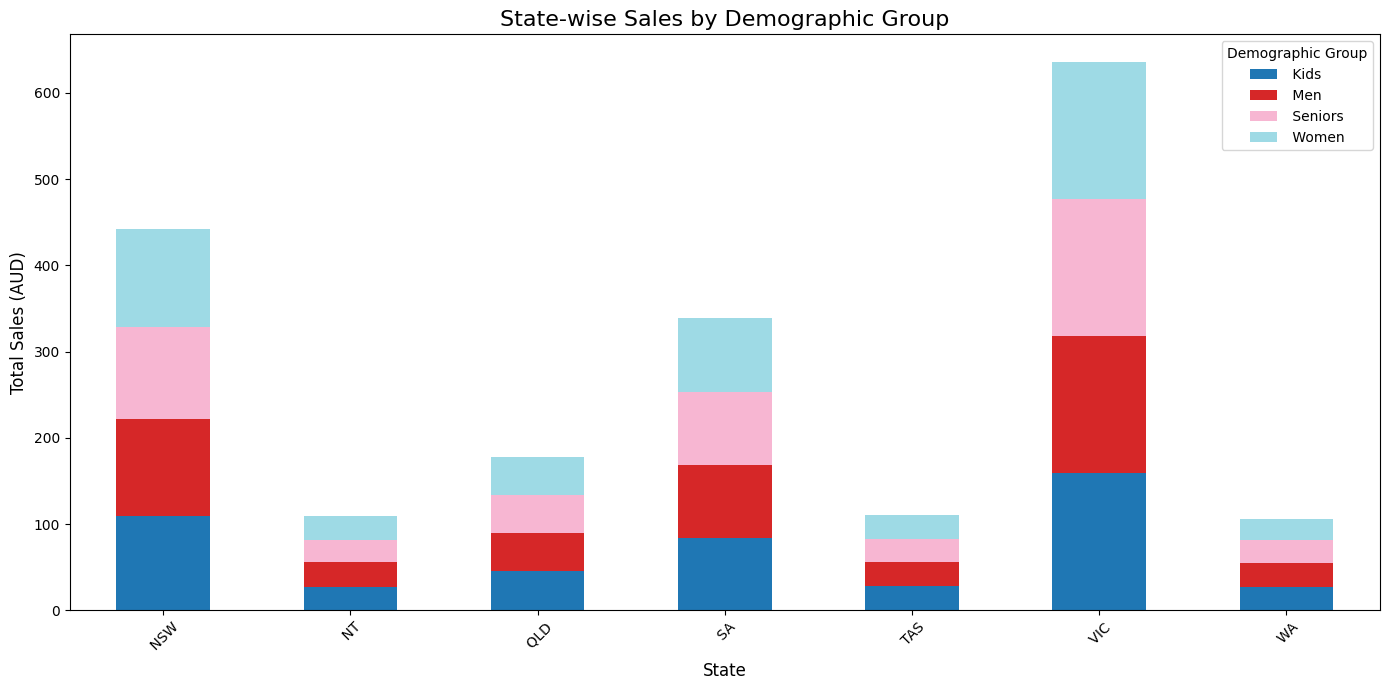

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
group_sales = df.groupby('Group')['Sales'].sum()
print(group_sales)
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().unstack(fill_value=0)
print("State-wise Sales Analysis by Demographic Group:\n")
print(state_group_sales)
# Plot the data
plt.figure(figsize=(12, 6))
state_group_sales.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 7))
# Add chart labels and formatting
plt.title('State-wise Sales by Demographic Group', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales (AUD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Demographic Group')
plt.tight_layout()
# Show the plot
plt.show()

#### Inferences from above visualization
1: State-wise sales analyzing for different demographic groups (kids, women, men, and seniors).                                                                                 
2: Using Barplot we can see that the state VIC has the highest total sales of different demographic groups.

Group Sales Analysis across various states:

State           NSW         NT        QLD         SA        TAS         VIC  \
Group                                                                         
Kids     109.444444  27.619048  45.460317  83.587302  28.095238  158.793651   
Men      112.206349  28.015873  44.714286  84.476190  27.984127  159.095238   
Seniors  106.904762  26.126984  43.428571  84.873016  27.301587  158.507937   
Women    113.158730  27.317460  44.285714  86.476190  26.841270  159.571429   

State           WA  
Group               
Kids     27.142857  
Men      27.952381  
Seniors  26.428571  
Women    24.841270  


<Figure size 1200x600 with 0 Axes>

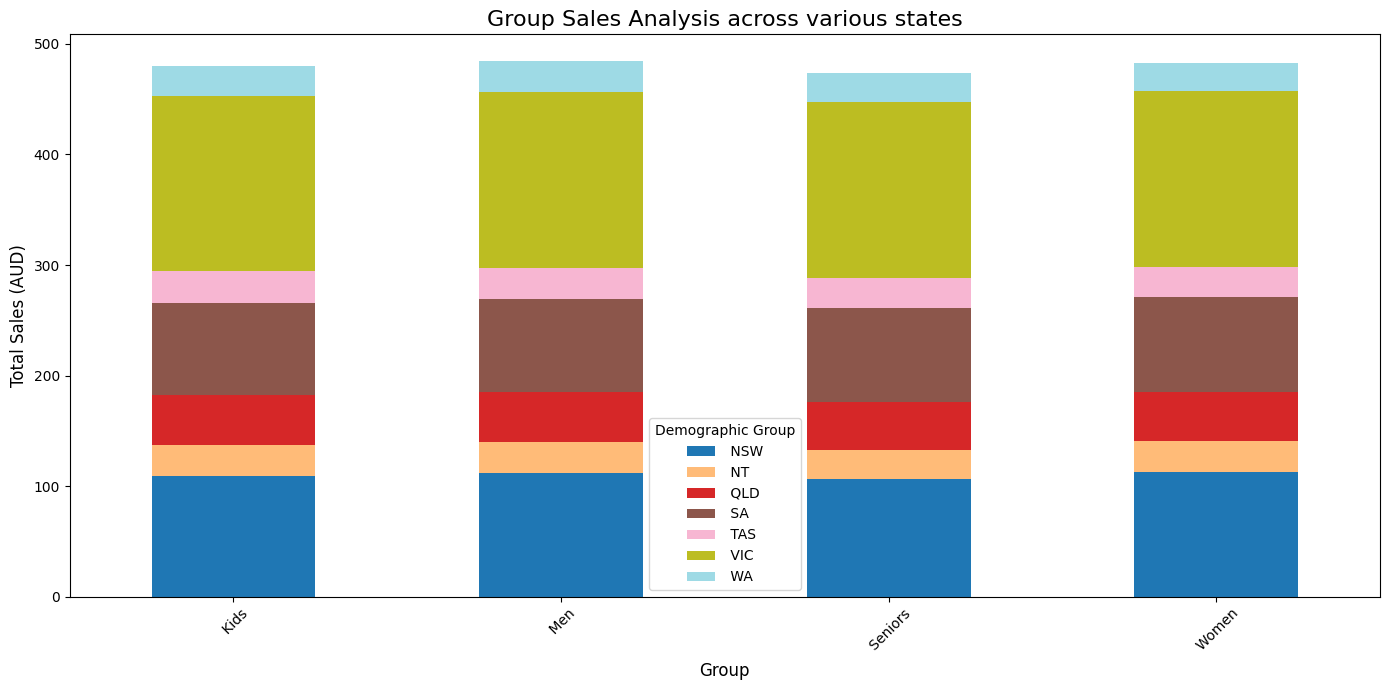

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
group_sales = df.groupby(['Group', 'State'])['Sales'].sum().unstack(fill_value=0)
print("Group Sales Analysis across various states:\n")
print(group_sales)
# Plot the data
plt.figure(figsize=(12, 6))
group_sales.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 7))
# Add chart labels and formatting
plt.title('Group Sales Analysis across various states', fontsize=16)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Total Sales (AUD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Demographic Group')
plt.tight_layout()
# Show the plot
plt.show()

#### Inferences from above visualization
1: Group-wise sales analysis (Kids, Women, Men, and Seniors) across
various states.                                                                           
2: So Men has slightly higher total sales from others..

Time
Morning      645.126984
Afternoon    643.857143
Evening      631.666667
Name: Sales, dtype: float64


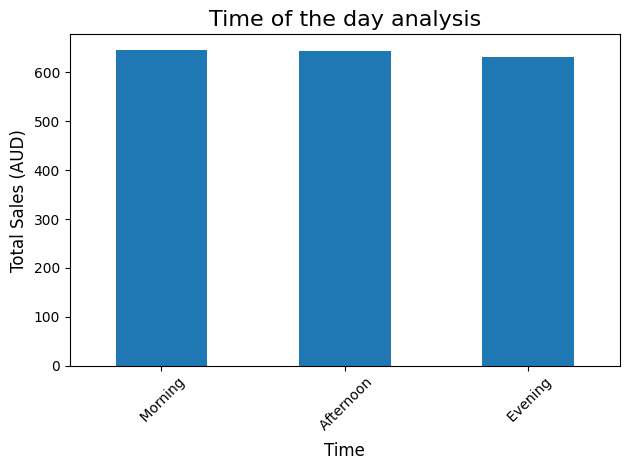

In [8]:
time_sales = df.groupby('Time')['Sales'].sum().sort_values(ascending=False)
print(time_sales)
time_sales.plot(kind='bar')
plt.title('Time of the day analysis', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total Sales (AUD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Inferences from above visualization
1: Time-of-the-day analysis: Identifying peak and off-peak sales periods
to facilitate strategic planning for S&M teams.                                          
2: So morning has highest peak sales period..

## Weekly Analysis 

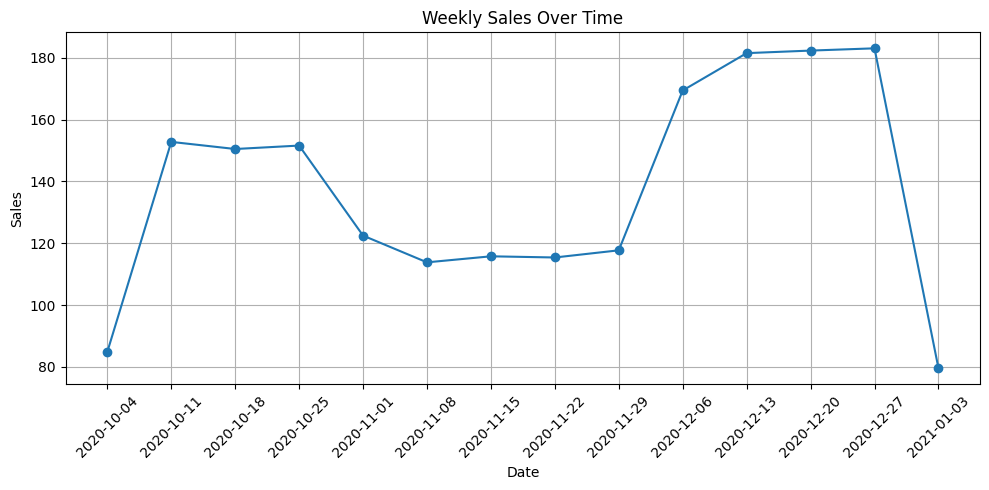

In [9]:
data=pd.read_csv('Weekly_Report.csv')
df1=pd.DataFrame(data)
import pandas as pd
import matplotlib.pyplot as plt
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(df1['Date'], df1['Sales'], marker='o', linestyle='-')
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Inferences from above Weekly Analysis
1: Initially we can see that sales from 4th Oct to 25th Oct the sales been constant.      
2: Then drastically the sales has downfall from 25th Oct to 29th Nov..                    
3: Highest sales occurred from 6th Dec to 27th Dec.              

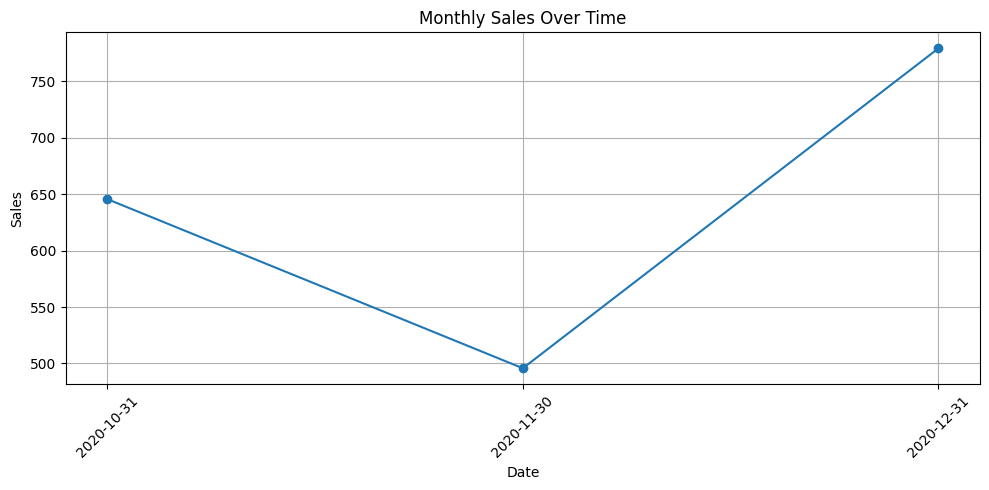

In [10]:
data=pd.read_csv('Monthly_Report.csv')
df2=pd.DataFrame(data)
import pandas as pd
import matplotlib.pyplot as plt
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(df2['Date'], df2['Sales'], marker='o', linestyle='-')
plt.title("Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Inferences from above Monthly Analysis
1: The sales has been dropped from 31st Oct to 30th Nov..  
2: Then made the highest sales from 30th Nov to 31st Dec.

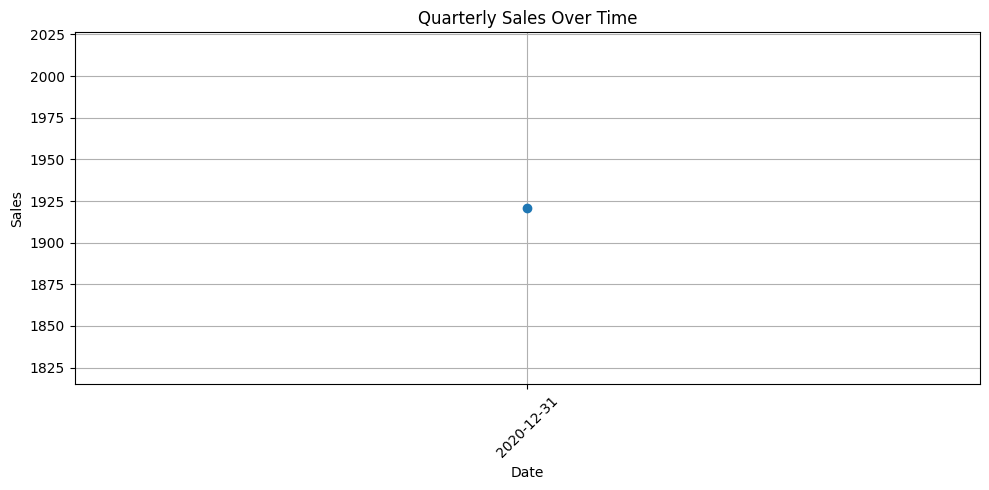

In [11]:
data=pd.read_csv('Quarterly_Report.csv')
df3=pd.DataFrame(data)
import pandas as pd
import matplotlib.pyplot as plt
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(df3['Date'], df3['Sales'], marker='o', linestyle='-')
plt.title("Quarterly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Inferences from above Quarterly Analysis
1: The sales remains constant in Quarterly ie on 31st Dec

### Conclusion 

##### Sales Distribution:
The Sales and Units data are right-skewed, meaning most of the sales were on the lower side, but there were a few high-value sales that increased the average.
This suggests that while high sales occurred, they were not frequent.
##### Top & Bottom Performing Groups:
Men's category had the highest total sales.
Kids' category had the lowest total sales.
This insight can help in targeting future promotions or inventory decisions.
##### Outlier Detection & Treatment:
Outliers in both Sales and Units columns were identified using the IQR method.
Outliers were visualized using boxplots and removed to ensure better accuracy in the analysis.
##### Time-Based Reports:
The dataset was resampled weekly, monthly, and quarterly to generate summarized reports.
These reports can help track sales performance over time and assist in seasonal or trend-based planning.